In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

plt.style.use('ggplot')

In [91]:
adresa = r'..\dataset\podaci_za_klasifikaciju'

In [92]:
def pripremi_podatke(adresa):
    X_train = pd.read_csv(f'{adresa}\X_resampled.csv')
    y_train = pd.read_csv(f'{adresa}\y_resampled.csv')
    X_test = pd.read_csv(f'{adresa}\X_test.csv')
    y_test = pd.read_csv(f'{adresa}\y_test.csv')
    return (X_train, X_test, y_train, y_test)

In [93]:
X_train, X_test, y_train, y_test = pripremi_podatke(adresa)
feature_names = X_train.columns

In [124]:
X_train.tail(20)

,Number_seasons,Games_played,At_bats,Runs,Hits,Doubles,Triples,Home_runs,RBIs,Walks,...,On_base_pct,Slugging_pct,Fielding_ave,Catcher,Designated_hitter,First_base,Outfield,Second_base,Shortstop,Third_base
2713,1.906431,1.873572,2.217063,2.623756,2.460536,2.264721,4.723195,0.124228,2.668736,0.882010,...,0.989321,1.004725,0.546982,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2714,1.387527,0.883704,0.792983,0.792560,0.664059,0.149451,0.491082,-0.747022,-0.081990,1.152695,...,0.595965,-0.840239,-0.486263,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2715,0.487472,0.050003,0.344254,0.852638,0.601931,0.536949,0.847457,-0.273081,0.678136,-0.352823,...,1.060161,0.680325,-1.078961,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2716,1.629558,0.691806,1.088674,2.426103,1.682354,2.269458,3.782639,0.206845,2.090967,1.322964,...,2.594920,2.186932,0.088466,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2717,0.942737,1.419632,1.460017,1.340990,1.590806,1.739356,-0.246599,2.972063,2.216239,0.717093,...,0.829267,2.132515,0.953642,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2718,0.458563,0.910518,0.918010,0.398583,0.692833,0.528735,1.576884,-0.554967,0.605075,-0.094424,...,-0.844579,-0.528602,-1.155077,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2719,0.914741,1.381918,1.446036,1.500131,1.675187,2.192745,2.483904,1.301883,2.348165,0.928171,...,1.047789,1.785229,0.808366,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2720,1.571271,1.641336,1.909290,1.643097,2.045634,0.992358,1.600875,-0.559542,0.350938,0.432450,...,0.445333,-0.127039,0.673718,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2721,1.850119,2.018892,1.840483,1.961836,1.932976,1.933923,2.562211,0.483359,2.206583,1.775026,...,1.142717,0.813125,-0.078902,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2722,0.873598,1.284388,1.439682,1.561380,1.757291,2.323065,2.560973,1.041435,2.195638,0.594103,...,1.063803,1.792674,0.746719,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [122]:
np.unique(X_train.iloc[:, 15:])

array([0., 1.])

In [95]:
y_train

,Hall_of_Fame
0,0
1,0
2,0
3,0
4,0
...,...
2728,2
2729,2
2730,2
2731,2


In [96]:
# !pip install termcolor
# !pip install imblearn
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored

def report_imbalanced(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['0', '1', '2'], index=['0', '1', '2']))
    print("---------------------------------------------------------------------------------")


In [97]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc
     
def auc_curve_plot(X_train, X_test, y_train, y_test, model):
    classifier_ovr = OneVsRestClassifier(model)
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    classifier_ovr.fit(X_train, y_train_bin)
    y_scores = classifier_ovr.predict_proba(X_test)

    fpr = {}
    tpr = {}
    roc_auc = {}

    for class_label in range(3):
        fpr[class_label], tpr[class_label], _ = roc_curve(y_test_bin[:, class_label], y_scores[:, class_label])
        roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

    plt.figure(figsize=(5, 5))
    colors = ['red', 'blue', 'green']
    classes = ['0 vs ostale', '1 vs ostale', '2 vs ostale']
    for class_label, color, class_name in zip(range(3), colors, classes):
        plt.plot(fpr[class_label], tpr[class_label], color=color, lw=2, label=f'{class_name} (AUC = {roc_auc[class_label]:.2f})')

    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('One-vs-Rest AUC Curve')
    plt.legend(loc='lower right')

    plt.show()

In [98]:
def train_and_evaluate_model(X_train, Y_train, X_test, Y_test, model):
    model.fit(X_train, Y_train.values.ravel())
    report_imbalanced(model, X_train, Y_train, "training")
    report_imbalanced(model, X_test, Y_test, "test")
    auc_curve_plot(X_train, X_test, Y_train, Y_test, model)
    return model

In [99]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00       911
          1       1.00      1.00      1.00      1.00      1.00      1.00       911
          2       1.00      1.00      1.00      1.00      1.00      1.00       911

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      2733

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
     0    1    2
0  911    0    0
1    0  911    0
2    0    0  911
---------------------------------------------------------------------------------
Classification report for model DecisionTreeCl

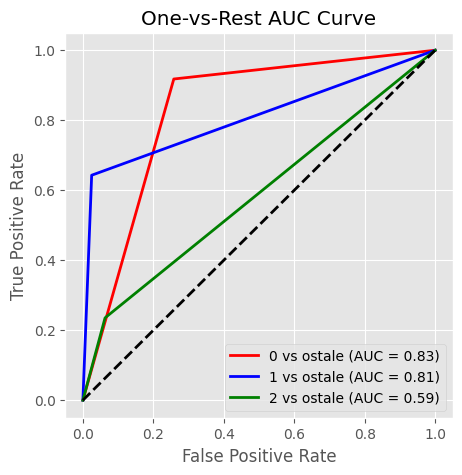

In [125]:
dtc = DecisionTreeClassifier()
model_DTC = train_and_evaluate_model(X_train, y_train, X_test, y_test, dtc)

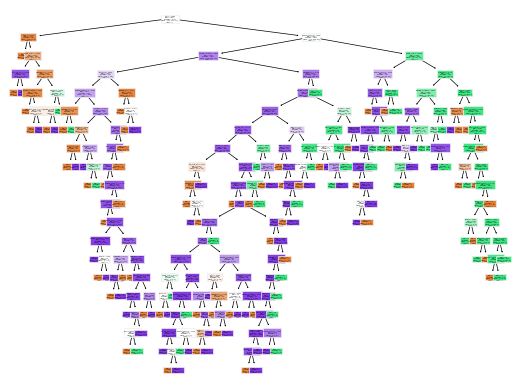

In [51]:
plot_tree(model_DTCSmote, feature_names=feature_names, class_names=['0', '1', '2'], filled=True)
plt.show()

In [101]:
from sklearn.model_selection import GridSearchCV

params =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(3, 10)],
    'max_features': [x for x in range(3, 10)]
}

estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3)

Classification report for model GridSearchCV on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.95      1.00      0.98      0.98      0.95       911
          1       0.99      0.99      1.00      0.99      0.99      0.99       911
          2       0.95      0.99      0.97      0.97      0.98      0.96       911

avg / total       0.98      0.98      0.99      0.98      0.98      0.97      2733

---------------------------------------------------------------------------------
Confusion matrix for model GridSearchCV on training data 
---------------------------------------------------------------------------------
     0    1    2
0  869    0   42
1    0  905    6
2    2    8  901
---------------------------------------------------------------------------------
Classification report for model GridSearchCV on test data
--------

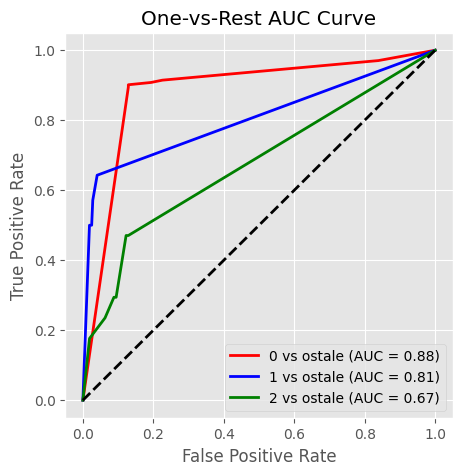

In [126]:
model_GSCV = train_and_evaluate_model(X_train, y_train, X_test, y_test, estimator)

In [103]:
estimator.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 6}

In [104]:
estimator.best_score_

0.9377972923527259

In [105]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=2)

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.99      0.98      0.98      0.99      0.97       911
          1       0.98      0.99      0.99      0.98      0.99      0.98       911
          2       0.99      0.95      1.00      0.97      0.97      0.94       911

avg / total       0.98      0.98      0.99      0.98      0.98      0.97      2733

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
     0    1    2
0  904    2    5
1    8  902    1
2   28   17  866
---------------------------------------------------------------------------------
Classification report for model RandomForestCl

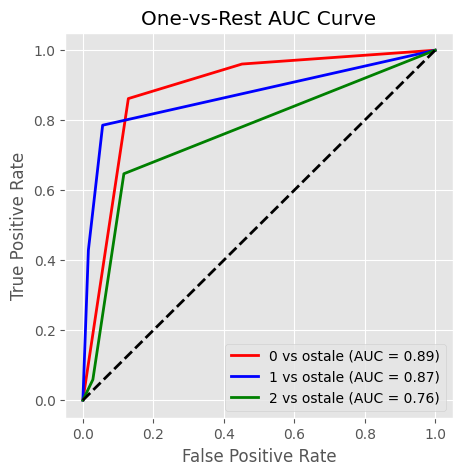

In [127]:
model_randomForest = train_and_evaluate_model(X_train, y_train, X_test, y_test, random_forest)

In [107]:
paramsForest = { 
    'max_depth' : [x for x in range(3, 14)],
    'max_features': [x for x in range(3, 10)],
    'criterion' :['gini', 'entropy']
}

In [108]:
estimatorforest = GridSearchCV(RandomForestClassifier(n_estimators=2), param_grid=paramsForest, cv=3)

Classification report for model GridSearchCV on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.98      0.99      0.97      0.98      0.96       911
          1       0.99      0.98      1.00      0.99      0.99      0.98       911
          2       0.97      0.97      0.99      0.97      0.98      0.96       911

avg / total       0.98      0.98      0.99      0.98      0.98      0.97      2733

---------------------------------------------------------------------------------
Confusion matrix for model GridSearchCV on training data 
---------------------------------------------------------------------------------
     0    1    2
0  889    3   19
1    8  897    6
2   19    5  887
---------------------------------------------------------------------------------
Classification report for model GridSearchCV on test data
--------

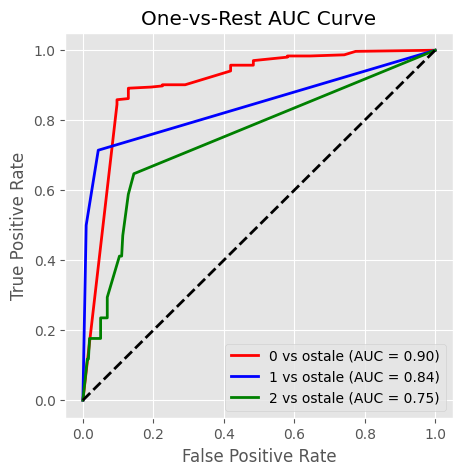

In [128]:
model_randomFGSCV = train_and_evaluate_model(X_train, y_train, X_test, y_test, estimatorforest)

In [110]:
estimatorforest.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 8}

In [111]:
estimatorforest.best_score_

0.9363336992316137

In [114]:
def feature_importance(model):
    pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False).plot.barh()
    plt.title("Feature importance")
    plt.show()

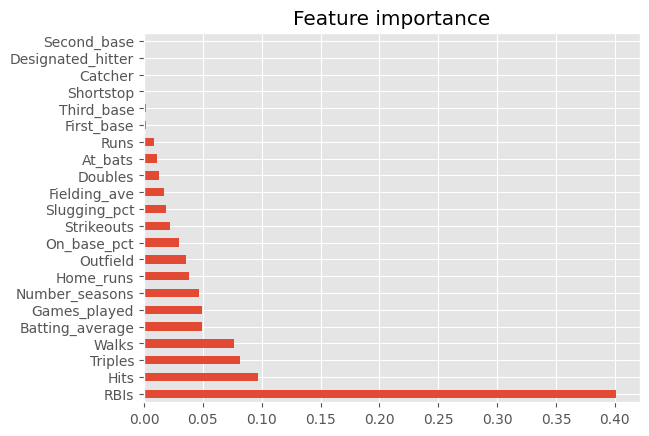

In [115]:
feature_importance(model_randomFGSCVSmote.best_estimator_)

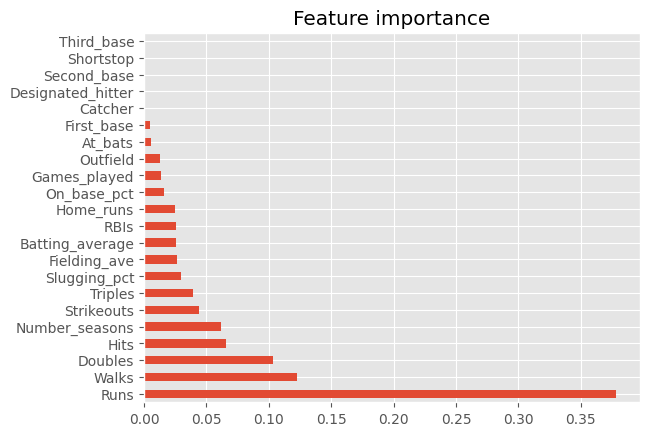

In [116]:
feature_importance(model_GSCVsmote.best_estimator_)

In [129]:
import pickle

models = [model_DTC, model_GSCV, model_randomForest, model_randomFGSCV]

model_names = ["model_DTC", "model_GSCV", "model_randomForest", "model_randomFGSCV"]


for model, modelname in zip(models, model_names):
    with open(f'Sačuvani modeli za stabla odlučivanja/{modelname}.pkl', 'wb') as file:  
        pickle.dump(model, file)